(1285, 1920, 3)
[INFO] loading model...
[INFO] classification took 0.34205 seconds
[INFO] 1. label: car wheel, probability: 0.27704
[INFO] 2. label: minivan, probability: 0.25742
[INFO] 3. label: grille, probability: 0.14088
[INFO] 4. label: beach wagon, probability: 0.10355
[INFO] 5. label: convertible, probability: 0.03548


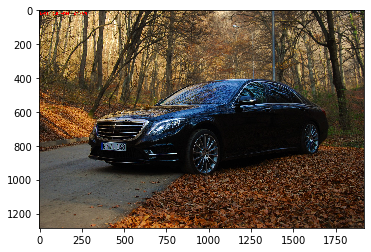

In [1]:
%matplotlib inline
import numpy as np
import argparse
import time
import cv2
import matplotlib.pyplot as plt

NET = 'SQZ'
#NET = 'GoogLe'

#img_path = './images/barbershop.png'
img_path = './images/car.jpg'
label_path = "./synset_words.txt"

model_sqz = './models/squeezenet_v1.0.caffemodel'
confing_sqz = './models/squeezenet_v1.0.prototxt'
model_googLe = './models/bvlc_googlenet.caffemodel'
config_googLe = './models/bvlc_googlenet.prototxt'

if NET == 'SQZ':
    model = model_sqz
    config = confing_sqz
elif NET == 'GoogLe':
    model = model_googLe
    config = config_googLe

rows = open(label_path).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

# load the input image from disk
image = cv2.imread(img_path)
print(image.shape)

# our CNN requires fixed spatial dimensions for our input image(s)
# so we need to ensure it is resized to 224x224 pixels while
# performing mean subtraction (104, 117, 123) to normalize the input;
# after executing this command our "blob" now has the shape:
# (1, 3, 224, 224)
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(config, model)

# set the blob as input to the network and perform a forward-pass to
# obtain our output classification
net.setInput(blob)
start = time.time()
preds = net.forward()
end = time.time()
print("[INFO] classification took {:.5} seconds".format(end - start))

# sort the indexes of the probabilities in descending order (higher
# probabilitiy first) and grab the top-5 predictions
preds = preds.reshape((1, len(classes)))
idxs = np.argsort(preds[0])[::-1][:5]

# loop over the top-5 predictions and display them
for (i, idx) in enumerate(idxs):
	# draw the top prediction on the input image
	if i == 0:
		text = "Label: {}, {:.2f}%".format(classes[idx],
			preds[0][idx] * 100)
		cv2.putText(image, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX,
			0.7, (0, 0, 255), 2)

	# display the predicted label + associated probability to the
	# console	
	print("[INFO] {}. label: {}, probability: {:.5}".format(i + 1,
		classes[idx], preds[0][idx]))

# display the output image
#cv2.imshow("Image", image)
#cv2.waitKey(0)
plt.imshow(image[:,:,::-1])